In [27]:
import ross as rs
import numpy as np
import plotly.graph_objects as go
import plotly.express as px


In [28]:
steel = rs.Material(name="Steel", rho=7810, E=211e9, G_s=81.2e9)
# Creating a list of shaft elements
L = 0.25
i_d = 0
o_d = 0.05
N_elem = 6

shaft_elements = [
    rs.ShaftElement(
        L=L,
        idl=i_d,
        odl=o_d,
        material=steel,
        shear_effects=True,
        rotary_inertia=True,
        gyroscopic=True,
    )
    for _ in range(N_elem)
]

disk = rs.DiskElement(
    n=2,
    m=32.58,
    Ip=0.178,
    Id=0.329,
    tag="Disk"
)

bearing0 = rs.BearingElement(
    n=0, 
    kxx=[0.5e6, 1.0e6, 2.5e6],
    kyy=[1.5e6, 2.0e6, 3.5e6],
    cxx=[0.5e3, 1.0e3, 1.5e3],
    frequency=[0, 1000, 2000],
)
bearing1 = rs.BearingElement(
    n=5, 
    kxx=[0.5e6, 1.0e6, 2.5e6],
    kyy=[1.5e6, 2.0e6, 3.5e6],
    cxx=[0.5e3, 1.0e3, 1.5e3],
    frequency=[0, 1000, 2000],
)
bearings = [bearing0, bearing1]

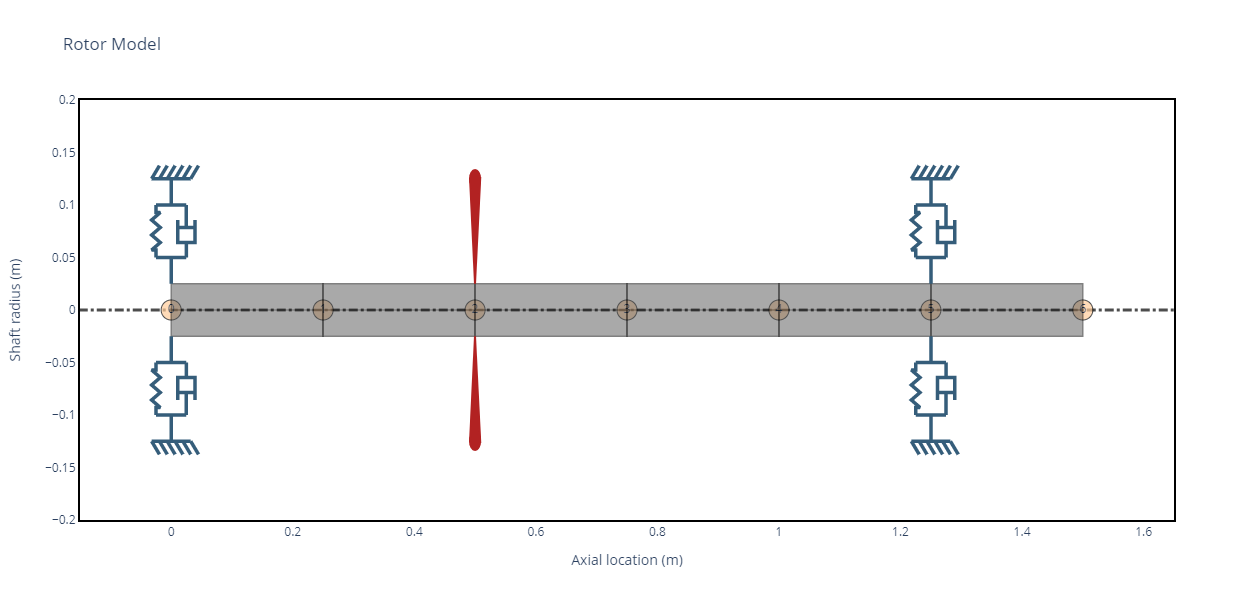

In [29]:
rotor = rs.Rotor(shaft_elements=shaft_elements, disk_elements=[disk], bearing_elements=bearings)
rotorfig = rotor.plot_rotor(width=1500,height=600)
rotorfig.update_yaxes(range=[-0.2, 0.2])
rotorfig.show()
rotorfig.write_html("rotorpic.html")

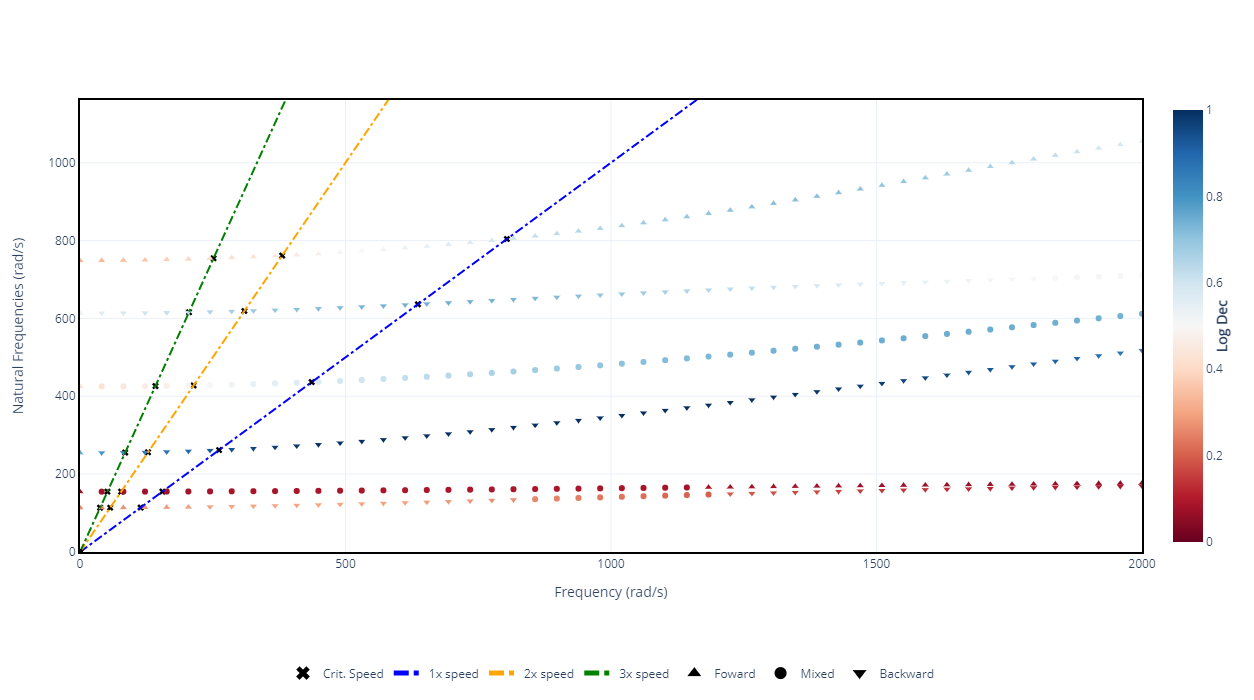

In [30]:
campbell = rotor.run_campbell(speed_range=np.linspace(0, 2000))
campbellfig = campbell.plot(harmonics=[1, 2, 3],width=1200,height=700)
campbellfig.show()